In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pylab as plt
from matplotlib import rcParams
#from scipy.stats import binned_statistic
import random
%matplotlib inline

In [2]:
#import data
data = pd.read_csv("./novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")

In [3]:
#set-up the plots size, font and background colours
rcParams['font.family'] = 'Arial Rounded MT Bold'
rcParams['font.size'] = '16'
rcParams['text.color'] = 'darkslategrey'
#rcParams['text.color'] = 'black'
rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'ghostwhite'
rcParams['figure.figsize'] = (16,10)

In [4]:
#select South Africa in the data for analysis and slice for March days
SA_data = data[data['Country/Region'] == 'South Africa']
daily = np.array(SA_data[SA_data.columns[43:74]])
dates = SA_data.columns[43:74]
daily_infections=[]
for i in daily:
    for j in i:
        daily_infections.append(j)

In [5]:
#set-up colors to use in bar plots
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=len(dates))

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


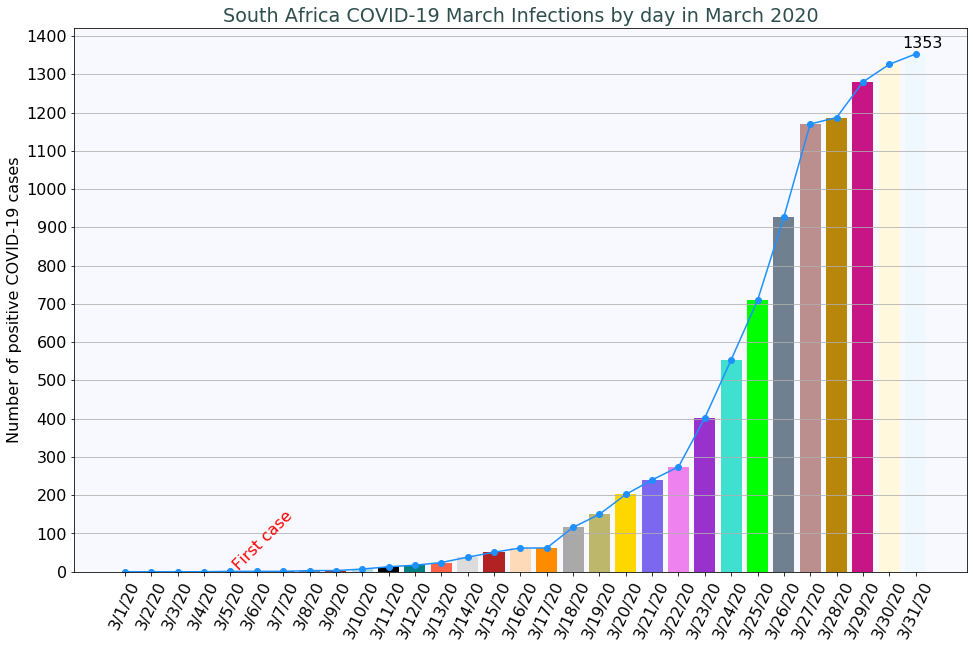

In [6]:
#cumulative data plot
plt.title('South Africa COVID-19 March Infections by day in March 2020')
plt.plot(dates, daily_infections,'r-o',color='dodgerblue') #line plot
plt.bar(dates, daily_infections,color=c)
plt.text(4,5,'First case',color='red',fontsize=16,rotation=45)
plt.text(29.5,1368,'1353',color='black',fontsize=16)
plt.xticks(rotation=65)
plt.yticks(range(0,1500, 100))
plt.ylabel('Number of positive COVID-19 cases')
#plt.ylim(0,1200)
plt.grid(axis='y')
#plt.savefig("Infections.jpg")
plt.show()

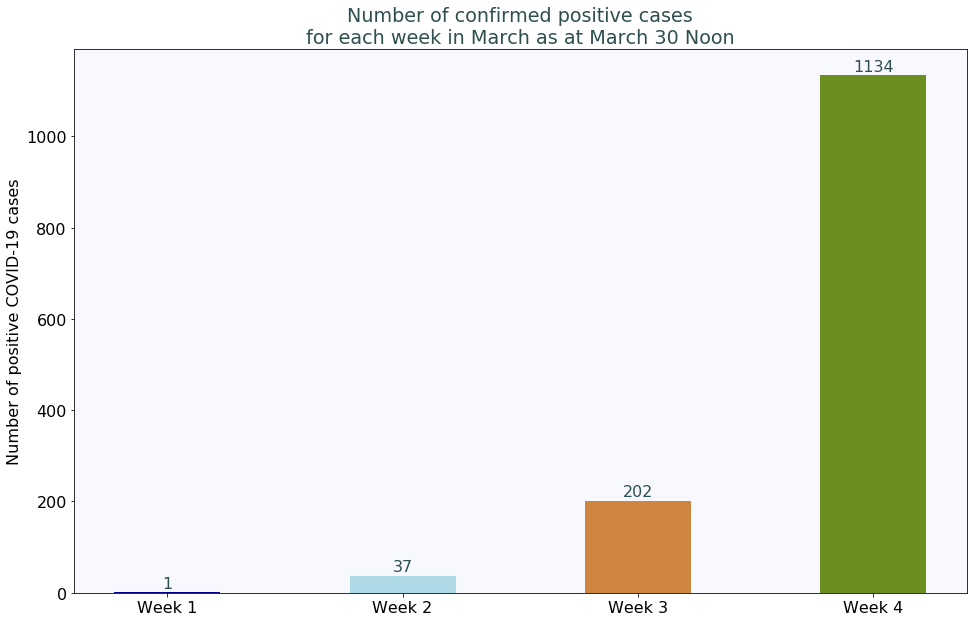

In [7]:
#visualize infection growth by weeks
weekly = [1,37,202,1134]
weeks = ['Week 1','Week 2','Week 3','Week 4']

plt.title('Number of confirmed positive cases\nfor each week in March as at March 30 Noon')
plt.bar(weeks,weekly,width=0.45,color=c)
plt.ylabel('Number of positive COVID-19 cases')
for i,weekly in enumerate(weekly):
    plt.text(i, weekly+10, weekly, horizontalalignment='center')
plt.show()

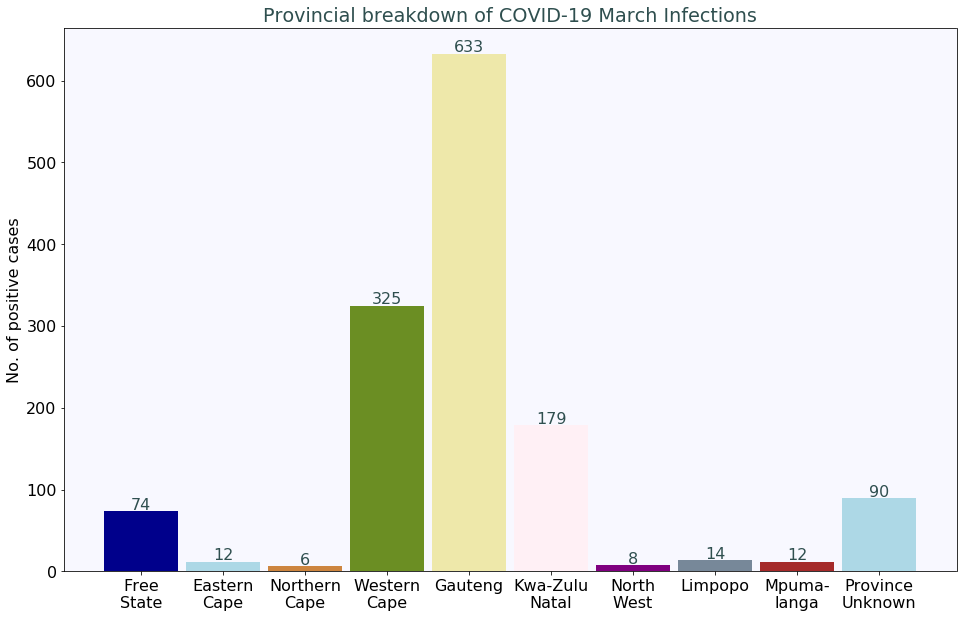

In [14]:
#provincial infections data plots
province = ['Free\nState','Eastern\nCape','Northern\nCape','Western\nCape','Gauteng',
            'Kwa-Zulu\nNatal','North\nWest','Limpopo','Mpuma-\nlanga', 'Province\nUnknown']

province_infections=[74, 12, 6, 325, 633, 179, 8, 14, 12, 90]
'''
provincial = df({'Province':['Free State','Eastern Cape','Northern Cape','Western Cape','Gauteng',
            'Kwa-Zulu Natal','North West','Limpopo','Mpumalanga', 'Province Unknown'],
            'Positive Cases':[74, 12, 6, 325, 633, 179, 8, 14, 12, 90]})
'''
plt.title('Provincial breakdown of COVID-19 March Infections')
plt.bar(province,province_infections,color=c,width=0.9)
plt.ylabel('No. of positive cases')
for j,province_infections in enumerate(province_infections):
    plt.text(j,province_infections+2, province_infections,horizontalalignment='center')
plt.xticks(rotation=0)
plt.show()

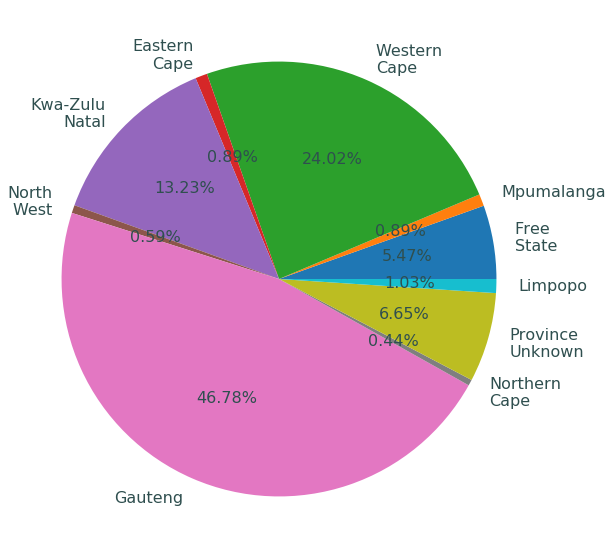

In [24]:
prov = ['Free\nState','Mpumalanga','Western\nCape','Eastern\nCape','Kwa-Zulu\nNatal','North\nWest','Gauteng',
        'Northern\nCape','Province\nUnknown','Limpopo']
prov_inf = [province_infections[0],province_infections[8], province_infections[3], 
            province_infections[1], province_infections[5], province_infections[6], province_infections[4],
            province_infections[2], province_infections[9], province_infections[7]]

plt.pie(prov_inf, labels=prov, autopct='%1.2f%%')
plt.show()

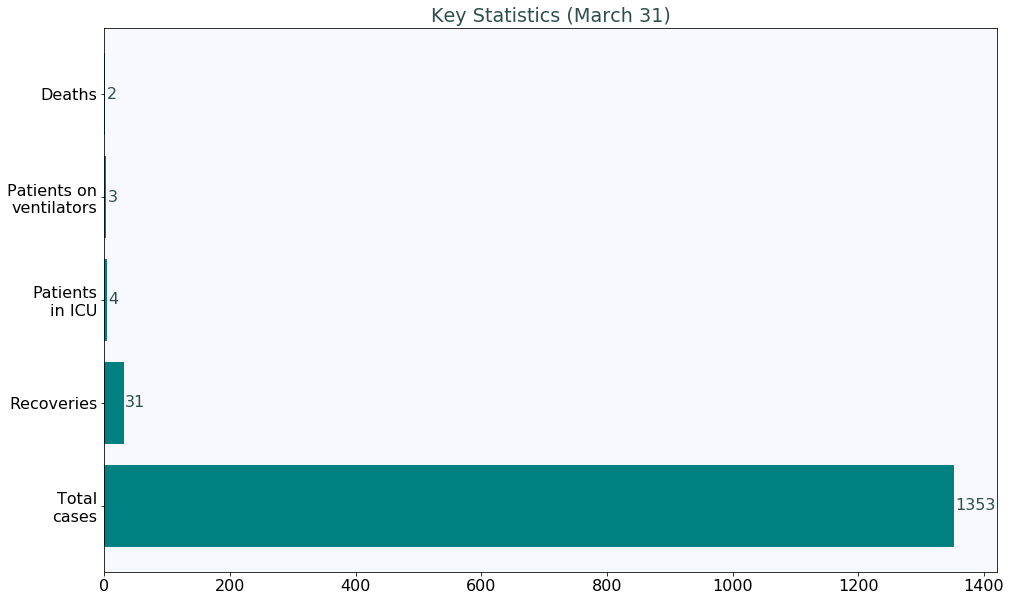

In [25]:
#national key statistics
data1 = ['Total\ncases','Recoveries','Patients\nin ICU', 'Patients on\nventilators','Deaths']
dat1=[1353,31,4,3,2]

plt.title('Key Statistics (March 31)')
plt.barh(data1, dat1,color='teal')
for k,dat1 in enumerate(dat1):
    plt.text(dat1+2,k,dat1,verticalalignment='center')
plt.show()